# **Lab 6: Differential Equations**
**Kristoffer Almroth**

# **Abstract**

Sixth lab in the course DD2363 Methods in Scientific Computing. This lab is about differential equations.

# **Set up environment**

Dependencies needed for running the code.

In [0]:
# Load neccessary modules.
from google.colab import files

import numpy as np
from scipy.linalg import expm
from matplotlib import pyplot as plt

# **Introduction**

We will solve problems of the type initial value problems (IVP) where we have 
$\frac{du}{dt} = \lambda u, \lambda \in \mathbb{R}$ over the interval $I = [0,T]$. One numerical approximation function to this problem is Explicit Euler:

$U_n \approx U_{n-1} + k f(U_{n-1},t_{n-1}), \space \space U_0 = u_0$

Explicit Euler is conditionally stable if $k < \frac{-2}{Re(\lambda)}$

We get the exact solution through $u(t) = C + e^{\lambda t}$ where C is dependent on the initial value $u_0$.

$C = u_0 - 1$ since $t_0 = 0$

For systems of IVP's in the linear case, we have that $\dot{u}(t) = Au(t)$ where $A \in \mathbb{R}^{N \times N}$, $u(0) = u_0$.

The system is stable if $Re(\lambda_i) < 0 \space \space \space \forall i = 1,...,N$

Source: Lecture notes

# **Methods**

### Time stepping for scalar initial value problem du/dt = f(u,t) ###

In [0]:
def ExplicitEuler(f, T, u_0, k):
  
  N = int(T/k)
  U = np.zeros(N+1)
  t = np.zeros(N+1)
  U[0] = u_0
  t[0] = 0

  for n in range(1, N+1):
    t[n] = t[n-1] + k
    U[n] = U[n-1] + k * f(U[n-1], t[n-1])
  
  return U

###Time stepping for a system of  initial value problems du/dt = f(u,t)###

The only change we have to do compared to the one dimensional case is to let U be a matrix of size $\mathbb{R}^{N \times 2}$

In [0]:
def ExplicitEulerSystem(f, T, u_0, k):
  
  N = int(T/k)
  U = np.zeros(shape=(N+1, u_0.size))
  t = np.zeros(N+1)
  U[0,:] = u_0
  t[0] = 0

  for n in range(1, N+1):
    t[n] = t[n-1] + k
    U[n,:] = U[n-1,:] + k * f(U[n-1,:], t[n-1])
  
  return U

# **Results**

## Initial Value Problem

For testing the Explicit Euler function, we choose $u_0 = 1$, $T = 1$ and $\lambda = -1.71$. The function is stable if $k < \frac{-2}{-1.71} = 1.16959064327$. 

In [0]:
u_0 = 1
l = -1.71
C = u_0 - 1
T = 1

f = lambda u, t: l*u
F = lambda t : C + np.exp(l*t)

First we compare the results with the exact solution for a smal $k$. We can see that the approximation is very close to the real value.

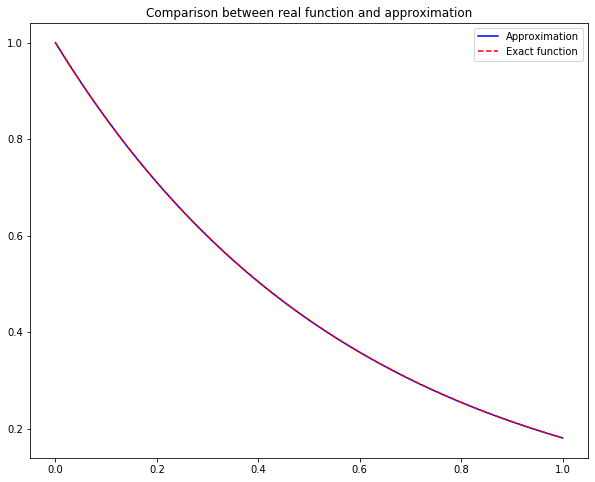

In [12]:
k = 0.001
N = int(T/k)
k_n = np.arange(0, T+k, k)

F_approx = ExplicitEuler(f, T, u_0, k)
F_real = np.zeros(N+1)
for n in range(0, N+1):
  F_real[n] = F(k_n[n])

plt.figure(figsize=(10,8))
plt.title("Comparison between real function and approximation")
plt.plot(k_n, F_approx, "-b", label="Approximation")
plt.plot(k_n, F_real, "-r", linestyle="--", label="Exact function")
plt.legend(loc="upper right")
plt.show()  

To find the error convergence of Explicit Euler, we plot the error convergence for different $k$-values. In the graph below we can see that the convergence is linear.

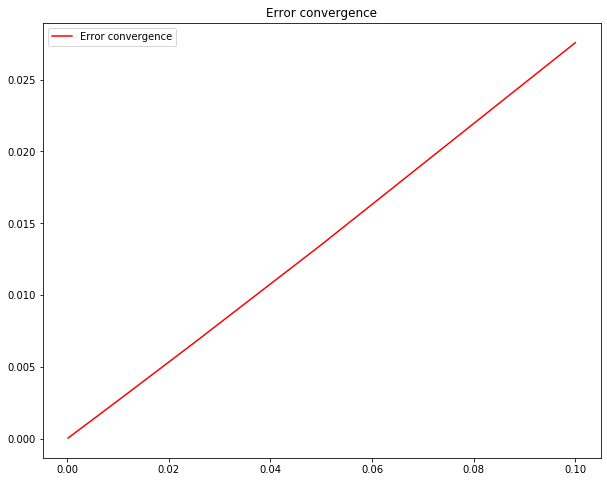

In [13]:
k_intervals = np.array([0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125, 0.000390625, 0.0001953125]) 
exact = F(T)
N = k_intervals.size
F_approxes = np.zeros(N)
for n in range(N):
  F_approxes[n] = abs(ExplicitEuler(f, T, u_0, k_intervals[n])[int(T/k_intervals[n])] - exact)

plt.figure(figsize=(10,8))
plt.title("Error convergence")
plt.plot(k_intervals, F_approxes, "-r", label="Error convergence")
plt.legend(loc="upper left")
plt.show()  

Testing stability could be done by choosing $k$-values above and below the theoretical value. With the values [2, 1, 0.5] we can see that [1, 0.5] converges towards the correct solution while the error in [2] increases.

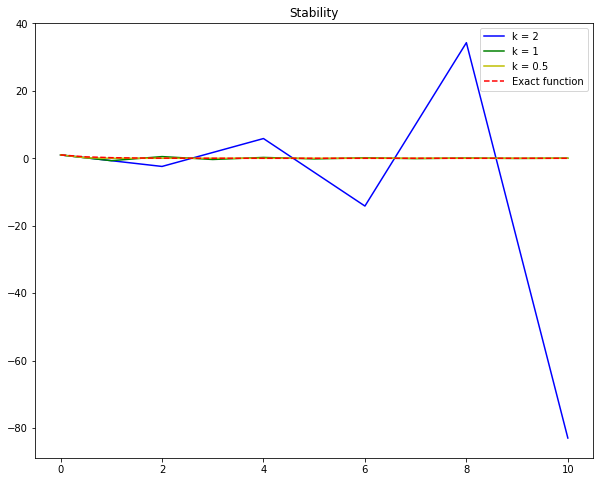

In [14]:
T = 10
k_intervals = np.array([2, 1, 0.5]) 

N = int(T/k_intervals[2])
k_n = np.arange(0, T+k_intervals[2], k_intervals[2])
F_real = np.zeros(N+1)
for n in range(0, N+1):
  F_real[n] = F(k_n[n])

plt.figure(figsize=(10,8))
plt.title("Stability")
plt.plot(np.arange(0, T+k_intervals[0], k_intervals[0]), ExplicitEuler(f, T, u_0, k_intervals[0]), "-b", label="k = 2")
plt.plot(np.arange(0, T+k_intervals[1], k_intervals[1]), ExplicitEuler(f, T, u_0, k_intervals[1]), "-g", label="k = 1")
plt.plot(np.arange(0, T+k_intervals[2], k_intervals[2]), ExplicitEuler(f, T, u_0, k_intervals[2]), "-y", label="k = 0.5")
plt.plot(k_n, F_real, "-r", linestyle="--", label="Exact function")
plt.legend(loc="upper right")
plt.show()  

## System of Initial Value Problems

For testing the Explicit Euler function on systems of IVP's, we choose 

$ A = 
\begin{bmatrix}
    -3 & 1 \\
    0 & -1 \\
\end{bmatrix}$ with the eigenvalues $\lambda_1 = -1, \lambda_2 = -3$

$u_0 = 
\begin{bmatrix}
    1 \\
    1 \\
\end{bmatrix}, T = 1$

In [0]:
u_0 = np.array([1, 1])
A = np.array([[-3, 1],[0, -1]])
T = 1

f = lambda u, t: A.dot(u)
F = lambda t : expm(A*t).dot(u_0)

In the first graph we see the comparison between the real value and the approximation for $k = 0.001$. The approximation is very close to the real value.

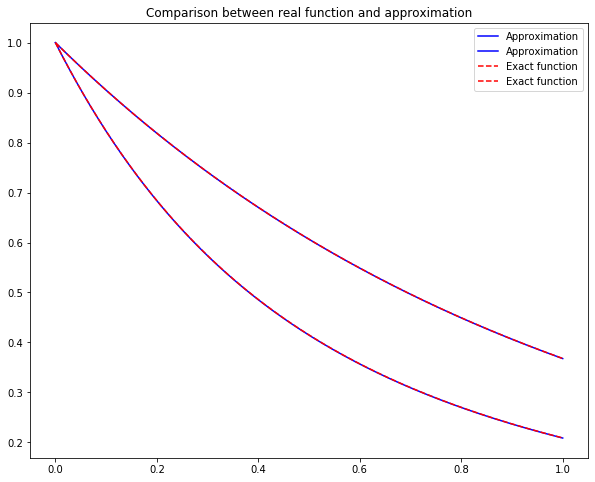

In [4]:
k = 0.001
N = int(T/k)
k_n = np.arange(0, T+k, k)

F_approx = ExplicitEulerSystem(f, T, u_0, k)
F_real = np.zeros(shape=(N+1,2))
for n in range(0, N+1):
  F_real[n,:] = F(k_n[n])

plt.figure(figsize=(10,8))
plt.title("Comparison between real function and approximation")
plt.plot(k_n, F_approx, "-b", label="Approximation")
plt.plot(k_n, F_real, "-r", linestyle="--", label="Exact function")
plt.legend(loc="upper right")
plt.show() 

The error convergence for systems of IVP's is linear, as expected when comparing it to the one dimensional case.

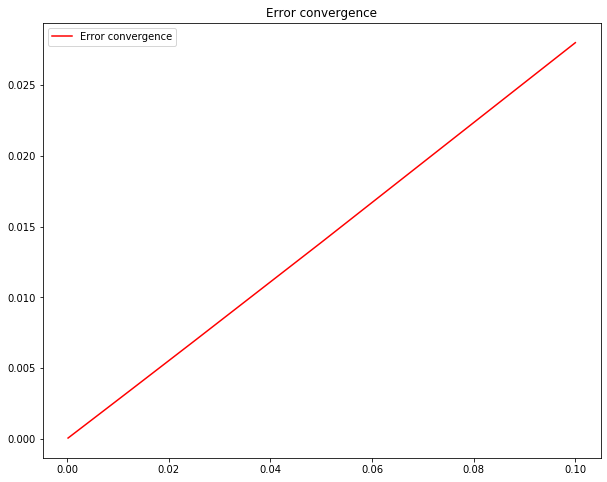

In [5]:
k_intervals = np.array([0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125, 0.000390625, 0.0001953125]) 
exact = F(T)
N = k_intervals.size
F_approxes = np.zeros(N)
for n in range(N):
  F_approxes[n] = np.linalg.norm(ExplicitEulerSystem(f, T, u_0, k_intervals[n])[int(T/k_intervals[n]),:] - exact)

plt.figure(figsize=(10,8))
plt.title("Error convergence")
plt.plot(k_intervals, F_approxes, "-r", label="Error convergence")
plt.legend(loc="upper left")
plt.show()  

We test the stability with three different $k$-values, [1, 0.5, 0.25]. We can see that the error grows for $k = 1$ and decreases for the other values. 

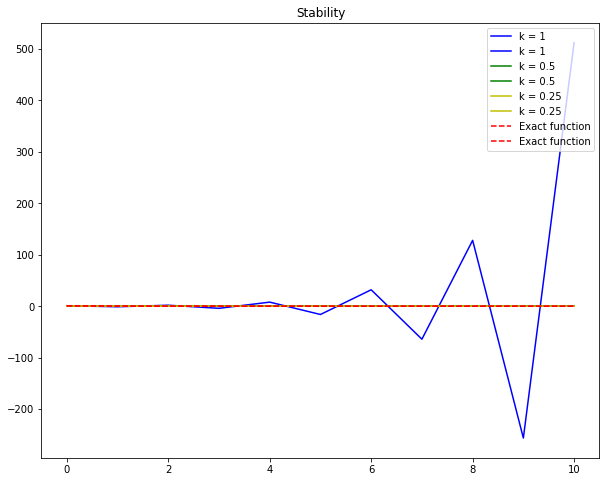

In [6]:
T = 10
k_intervals = np.array([1, 0.5, 0.25]) 

N = int(T/k_intervals[2])
k_n = np.arange(0, T+k_intervals[2], k_intervals[2])
F_real = np.zeros(shape=(N+1,2))
for n in range(0, N+1):
  F_real[n,:] = F(k_n[n])

plt.figure(figsize=(10,8))
plt.title("Stability")
plt.plot(np.arange(0, T+k_intervals[0], k_intervals[0]), ExplicitEulerSystem(f, T, u_0, k_intervals[0]), "-b", label="k = 1")
plt.plot(np.arange(0, T+k_intervals[1], k_intervals[1]), ExplicitEulerSystem(f, T, u_0, k_intervals[1]), "-g", label="k = 0.5")
plt.plot(np.arange(0, T+k_intervals[2], k_intervals[2]), ExplicitEulerSystem(f, T, u_0, k_intervals[2]), "-y", label="k = 0.25")
plt.plot(k_n, F_real, "-r", linestyle="--", label="Exact function")
plt.legend(loc="upper right")
plt.show()  

# **Discussion**

For systems of IVP's, the system was stable for all $k$-values except for $k = 1$, which is interesting since the largest eigenvalue for the system tested was $-1$. It seems like the stability for systems of IVP's is dependent on the largest eigenvalue.

This lab was fun to implement. testing the stability of the functions was interesting, and seeing how chaotic it gets when the equation was unstable.